In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product

100% 100M/100M [00:05<00:00, 22.3MB/s] 
100% 100M/100M [00:05<00:00, 19.4MB/s]


In [3]:
import zipfile
zip_f = zipfile.ZipFile("/content/real-life-industrial-dataset-of-casting-product.zip")
zip_f.extractall("/content")
zip_f.close()

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [5]:
with_ok_front = os.listdir('/content/casting_512x512/casting_512x512/ok_front')
print(with_ok_front[0:5])
print(with_ok_front[-5:])

['cast_ok_0_8127.jpeg', 'cast_ok_0_1573.jpeg', 'cast_ok_0_9959.jpeg', 'cast_ok_0_3440.jpeg', 'cast_ok_0_9135.jpeg']
['cast_ok_0_4597.jpeg', 'cast_ok_0_8616.jpeg', 'cast_ok_0_4413.jpeg', 'cast_ok_0_2784.jpeg', 'cast_ok_0_4863.jpeg']


In [6]:
with_def_front = os.listdir('/content/casting_512x512/casting_512x512/def_front')
print(with_def_front[0:5])
print(with_def_front[-5:])

['cast_def_0_9068.jpeg', 'cast_def_0_5640.jpeg', 'cast_def_0_5978.jpeg', 'cast_def_0_5892.jpeg', 'cast_def_0_1283.jpeg']
['cast_def_0_2683.jpeg', 'cast_def_0_8697.jpeg', 'cast_def_0_7998.jpeg', 'cast_def_0_3618.jpeg', 'cast_def_0_9388.jpeg']


In [7]:
print('Number of ok images:', len(with_ok_front))
print('Number of defective images:', len(with_def_front))

Number of ok images: 519
Number of defective images: 781


In [8]:
# Creating Labels for the two class of Images

# with ok --> 1

# with def --> 0

In [9]:
# create the labels

with_ok_labels = [1]*519

with_def_labels = [0]*781

In [10]:
print(len(with_ok_labels))

print(len(with_def_labels))

519
781


In [11]:
labels = with_ok_labels + with_def_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

1300
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
#Displaying the Images

**Displaying the Images**

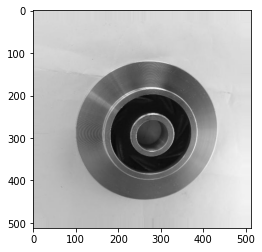

In [13]:
# displaying with OK image
img = mpimg.imread('/content/casting_512x512/casting_512x512/ok_front/cast_ok_0_1018.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [14]:
print(img.shape)

(512, 512, 3)


In [15]:
with_ok_front_path = "/content/casting_512x512/casting_512x512/ok_front/"
img_file = "cast_def_0_0.jpeg"
path = with_ok_front_path + img_file
isExisting = os.path.exists(path)
print(isExisting)

False


In [16]:
# convert images to numpy arrays+

with_ok_front_path = "/content/casting_512x512/casting_512x512/ok_front/"

data = []

for img_file in os.listdir(with_ok_front_path):

  image = Image.open( with_ok_front_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



with_def_front_path = '/content/casting_512x512/casting_512x512/def_front/'


for img_file in os.listdir(with_def_front_path):


  image = Image.open(with_def_front_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [17]:
type(data)

list

In [18]:
len(data)

1300

In [19]:
data[0]

array([[[228, 228, 228],
        [228, 228, 228],
        [228, 228, 228],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [233, 233, 233]],

       [[228, 228, 228],
        [228, 228, 228],
        [228, 228, 228],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [233, 233, 233]],

       [[228, 228, 228],
        [228, 228, 228],
        [228, 228, 228],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [233, 233, 233]],

       ...,

       [[215, 215, 215],
        [215, 215, 215],
        [215, 215, 215],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       [[214, 214, 214],
        [214, 214, 214],
        [214, 214, 214],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[214, 214, 214],
        [214, 214, 214],
        [214, 214, 214],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
print(X.shape)
print(Y.shape)

(1300, 128, 128, 3)
(1300,)


In [24]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1300, 128, 128, 3) (1040, 128, 128, 3) (260, 128, 128, 3)


In [27]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [28]:
X_train[0]

array([[[161, 161, 161],
        [161, 161, 161],
        [162, 162, 162],
        ...,
        [168, 168, 168],
        [168, 168, 168],
        [167, 167, 167]],

       [[158, 158, 158],
        [160, 160, 160],
        [161, 161, 161],
        ...,
        [167, 167, 167],
        [168, 168, 168],
        [166, 166, 166]],

       [[161, 161, 161],
        [161, 161, 161],
        [161, 161, 161],
        ...,
        [167, 167, 167],
        [167, 167, 167],
        [166, 166, 166]],

       ...,

       [[126, 126, 126],
        [125, 125, 125],
        [126, 126, 126],
        ...,
        [136, 136, 136],
        [136, 136, 136],
        [135, 135, 135]],

       [[128, 128, 128],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [136, 136, 136],
        [138, 138, 138],
        [136, 136, 136]],

       [[128, 128, 128],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [136, 136, 136],
        [138, 138, 138],
        [136, 136, 136]]

In [29]:
X_train_scaled[0]

array([[[0.63137255, 0.63137255, 0.63137255],
        [0.63137255, 0.63137255, 0.63137255],
        [0.63529412, 0.63529412, 0.63529412],
        ...,
        [0.65882353, 0.65882353, 0.65882353],
        [0.65882353, 0.65882353, 0.65882353],
        [0.65490196, 0.65490196, 0.65490196]],

       [[0.61960784, 0.61960784, 0.61960784],
        [0.62745098, 0.62745098, 0.62745098],
        [0.63137255, 0.63137255, 0.63137255],
        ...,
        [0.65490196, 0.65490196, 0.65490196],
        [0.65882353, 0.65882353, 0.65882353],
        [0.65098039, 0.65098039, 0.65098039]],

       [[0.63137255, 0.63137255, 0.63137255],
        [0.63137255, 0.63137255, 0.63137255],
        [0.63137255, 0.63137255, 0.63137255],
        ...,
        [0.65490196, 0.65490196, 0.65490196],
        [0.65490196, 0.65490196, 0.65490196],
        [0.65098039, 0.65098039, 0.65098039]],

       ...,

       [[0.49411765, 0.49411765, 0.49411765],
        [0.49019608, 0.49019608, 0.49019608],
        [0.49411765, 0

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [31]:
model = keras.Sequential()



model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(128,128,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [32]:
# compile the neural network
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=16)

Epoch 1/16
30/30 [==============================] - 12s 33ms/step - loss: 0.6994 - accuracy: 0.5726 - val_loss: 0.6504 - val_accuracy: 0.6731
Epoch 2/16
30/30 [==============================] - 1s 21ms/step - loss: 0.6569 - accuracy: 0.5865 - val_loss: 0.6509 - val_accuracy: 0.6731
Epoch 3/16
30/30 [==============================] - 1s 21ms/step - loss: 0.6364 - accuracy: 0.6197 - val_loss: 0.5381 - val_accuracy: 0.6442
Epoch 4/16
30/30 [==============================] - 1s 21ms/step - loss: 0.5758 - accuracy: 0.6752 - val_loss: 0.5001 - val_accuracy: 0.7212
Epoch 5/16
30/30 [==============================] - 1s 20ms/step - loss: 0.5229 - accuracy: 0.7169 - val_loss: 0.4466 - val_accuracy: 0.7692
Epoch 6/16
30/30 [==============================] - 1s 20ms/step - loss: 0.4511 - accuracy: 0.7628 - val_loss: 0.4425 - val_accuracy: 0.7692
Epoch 7/16
30/30 [==============================] - 1s 19ms/step - loss: 0.4697 - accuracy: 0.7735 - val_loss: 0.4289 - val_accuracy: 0.7692
Epoch 8/16
3

In [34]:
model.save("Casting.h5")

In [35]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test_Accuracy =', accuracy)

9/9 [==============================] - 0s 17ms/step - loss: 0.4028 - accuracy: 0.7962
Test_Accuracy = 0.7961538434028625


In [36]:
# we can even plot the accuracy and the loss against all the epochs

def plotting(history,keyword):
  
  plt.plot(history.history[keyword])
  plt.plot(history.history["val_"+keyword])
  plt.plot(accuracy)

  plt.title("model "+keyword)
  plt.ylabel(keyword)
  plt.xlabel("epoch")

  plt.legend(["training data","validation data"])

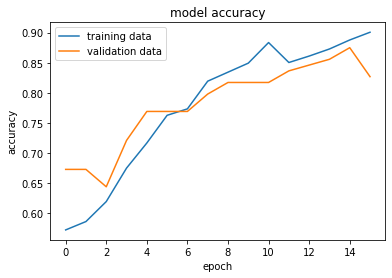

In [37]:
plotting(history,"accuracy")

Predictive **System**

Path of the image to be predicted: /content/casting_data/casting_data/test/ok_front/cast_ok_0_10.jpeg


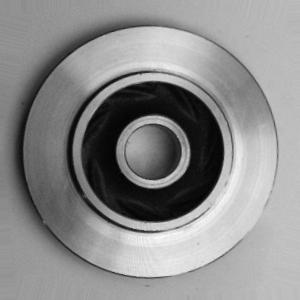

1/1 [==============================] - 0s 178ms/step
[[0.83447254]]
0
Cating is Ok


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_prediction >= 0.65:

  print('Cating is Ok')

else:

  print('Casting is defective')